# **Customer-Churn-Predictor**

## 1. Business Understanding

Customer churn is a critical challenge faced by businesses across various industries.<br>In an increasingly competitive market, retaining customers is more cost-effective than acquiring new ones.<br>Therefore, understanding and predicting customer churn has become a strategic priority for businesses aiming to enhance customer retention and maximize revenue.

This project aims to develop a predictive model to identify customers at risk of churning. By leveraging historical customer data and advanced machine learning techniques, we will uncover patterns and factors contributing to churn.<br>These insights will guide the development of proactive retention strategies, ensuring the business can mitigate churn effectively.

### 1.1. Hypothesis Testing
**Null Hypothesis (Ho)**: The total amount charged to a customer has no statistical significant influence on wether the customer will churn or not 

**Alternate Hypothesis (Ha)**: The total amount charged to a customer has statistical significant influence on whether the customer will churn or not.

### 1.2. Analytical Questions
1. Which customer is most likely to churn?<br>
a) Perform statistical analysis tests for for the assumption that Churn is not influenced by customer demographics.<br>
b) Calculate the churn rate for each gender<br>
c) Calculate the churn rate for each SeniorCitizen<br>
d) Calculate the churn rate for customers with Partners<br>
e) Calculate the churn rate for customers with Dependents<br>
2. Identify which service is associated with customer churning<br>
a) Perform statistical test on services presumed to be associated with customer churning<br>
3. What internet services is most likely to have the most loyal customers?<br>
4. What could be the reason behind a particular internet service recording high churn rate?<br>
5. How does tenure influence customer churn?

## 2. Data Understanding
Our dataset contains various customer attributes that can help us understand and predict customer churn. Each column represents a different aspect of the customer's profile, service usage, and payment behavior. The columns in our dataset are:

`Feature Description`:
- **customerID**: Unique identifier for each customer.
- **gender**: Customer's gender.
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1) or not (0).
- **Partner**: Indicates if the customer has a partner.
- **Dependents**: Indicates if the customer has dependents.
- **tenure**: Number of months the customer has stayed with the company.
- **PhoneService**: Indicates if the customer has a phone service.
- **MultipleLines**: Indicates if the customer has multiple phone lines.
- **InternetService**: Type of internet service the customer has (e.g., DSL, Fiber optic, None).
- **OnlineSecurity**: Indicates if the customer has online security add-on.
- **OnlineBackup**: Indicates if the customer has online backup add-on.
- **DeviceProtection**: Indicates if the customer has device protection add-on.
- **TechSupport**: Indicates if the customer has tech support add-on.
- **StreamingTV**: Indicates if the customer has streaming TV service.
- **StreamingMovies**: Indicates if the customer has streaming movies service.
- **Contract**: Type of contract the customer has (e.g., month-to-month, one year, two years).
- **PaperlessBilling**: Indicates if the customer uses paperless billing.
- **PaymentMethod**: Method of payment used by the customer (e.g., electronic check, mailed check, bank transfer, credit card).
- **MonthlyCharges**: The amount charged to the customer monthly.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Indicates if the customer has churned (Yes) or not (No).

### 2.1. Data Collection

### Import libraries

In [73]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# System and File Handling
import os
import re
import joblib

# Database Interaction
import pyodbc

# Statistical Analysis
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import uniform, randint

# Environment Variables
from dotenv import dotenv_values

# Machine Learning - Data Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Imbalanced-learn library for handling class imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Machine Learning - Model Evaluation
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Warnings
import warnings
warnings.filterwarnings("ignore")

### Load Environment Variables and Create SQL Server Connection

In [74]:
import os
from dotenv import load_dotenv

# Get the current working directory
current_dir = os.getcwd()

# Construct the path to the .env file located in the current directory
dotenv_path = os.path.join(current_dir, '.env')

# Load the .env file
load_dotenv(dotenv_path)

# Access variables from .env file
server = os.getenv("SERVER_NAME")
user_name = os.getenv("USER_NAME")
password = os.getenv("PASSWORD")
database = os.getenv("DATABASE_NAME")


In [75]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};UID={user_name};DATABASE={database};PWD={password}"

# Connect to the server using pyodbc
connection = pyodbc.connect(connection_string)

### 2.2. Load Dataset

In [76]:
# Retrieve table from database
sql_querry = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# Retrieve dataset from database with connection created
df_first = pd.read_sql(sql_querry, connection)

# Load csv and xlsx files
df_second = pd.read_csv("./data/LP2_Telco-churn-second-2000.csv")
df_third = pd.read_excel("./data/Telco-churn-last-2000.xlsx")

In [77]:
# Preview first dataframe
df_first.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [78]:
# Preview second dataframe
df_second.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


### 2.3. Exploratory Data Analysis
#### 2.3.1. Data Quality and Assessment
#### **`First Dataframe`**

In [79]:
# Check characteristics of dataframe
print(df_first.info(), "\n====================== Null Value Count / Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_first.isna().sum(), "percentage_null_value": df_first.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicated rows
print(df_first.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


We replace True and False entries in the first dataframe with Yes and No respectively

In [80]:
# Define the change_bool function
def change_bool(df):
    """
    Returns a DataFrame with True and False entries replaced by Yes and No respectively
    """
    for column in df.columns:
        df[column] = df[column].map(lambda v: "Yes" if v is True else "No" if v is False else v)
    return df

# Apply the change_bool function using pipe
df_first = df_first.pipe(change_bool)
df_first.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


#### **`Second Dataframe`**

In [81]:
# Check characteristics of dataframe
print(df_second.info(), "\n====================== Null Value Count / Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_second.isna().sum(), "percentage_null_value": df_second.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicated rows
print(df_second.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


filter out non-numeric entries present in the TotalCharges column 

In [82]:
pattern = r"[^0-9.]"
df_second.loc[df_second["TotalCharges"].str.contains(pattern, regex = True)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [83]:
# Replace all empty entries with NAN and convert datatype to float
df_second["TotalCharges"] = df_second["TotalCharges"].replace(" ", np.nan).astype(float)

# Replace 0 and 1 in the SeniorCitizen column with No and Yes respectively
df_second["SeniorCitizen"] = df_second["SeniorCitizen"].replace(1, "Yes")
df_second["SeniorCitizen"] = df_second["SeniorCitizen"].replace(0, "No")

# Preview dataframe
df_second.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


Check for standardisation in column names

In [84]:
print(df_first.columns)
print(df_second.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### **`Concatenated Dataset`**<br>

Now that data entries of both datasets are consistent and column names are standardised, we then concatenate both dataframes   

In [85]:
# Concatenate the first and second datasets
df_combined = pd.concat([df_first, df_second], axis = 0)
# Reset index
df_combined.reset_index(drop = True, inplace = True)
df_combined.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [86]:
# Check characteristics of dataframe
print(df_combined.info(), "\n====================== Null Value Count / Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_combined.isna().sum(), "percentage_null_value": df_combined.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicated rows
print(df_combined.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [87]:
des_stats = df_combined.describe().T.style.background_gradient(cmap = "YlOrRd")
des_stats

,count,mean,std,min,25%,50%,75%,max
tenure,5043.000000,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.000000,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.000000,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


#### 2.3.2. Univariate Analysis

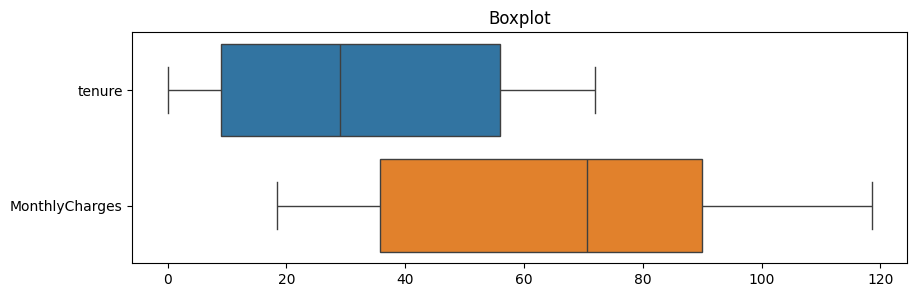

In [88]:
plt.figure(figsize = (10, 3))
sns.boxplot(df_combined.drop(["TotalCharges"], axis = 1), orient = "h")
plt.title("Boxplot")
plt.show()


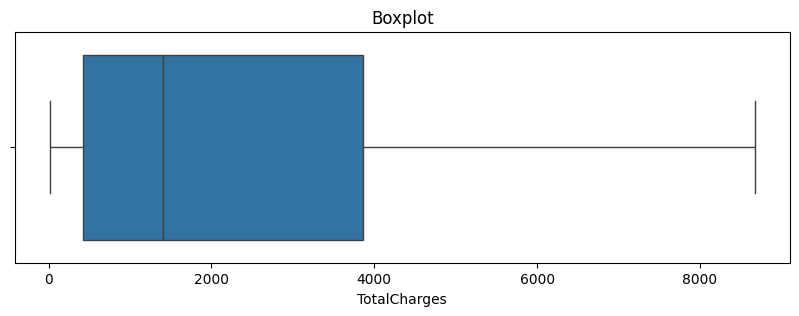

In [89]:
plt.figure(figsize = (10, 3))
sns.boxplot(df_combined["TotalCharges"], orient = "h")
plt.title("Boxplot")
plt.show()

#### **Key Insights**:
- There are no apparent outliers in tenure, MonthlyCharges, and TotalCharges. Their absence means that the data is more indicative of typical conditions, reducing the risk of basing decisions on anomalous or non-representative data points.<br>
- tenure, MonthlyCharges, and TotalCharges are not normally distributed and hence need to be transformed for statistical testing and machine learning modelling.

KeyboardInterrupt: 

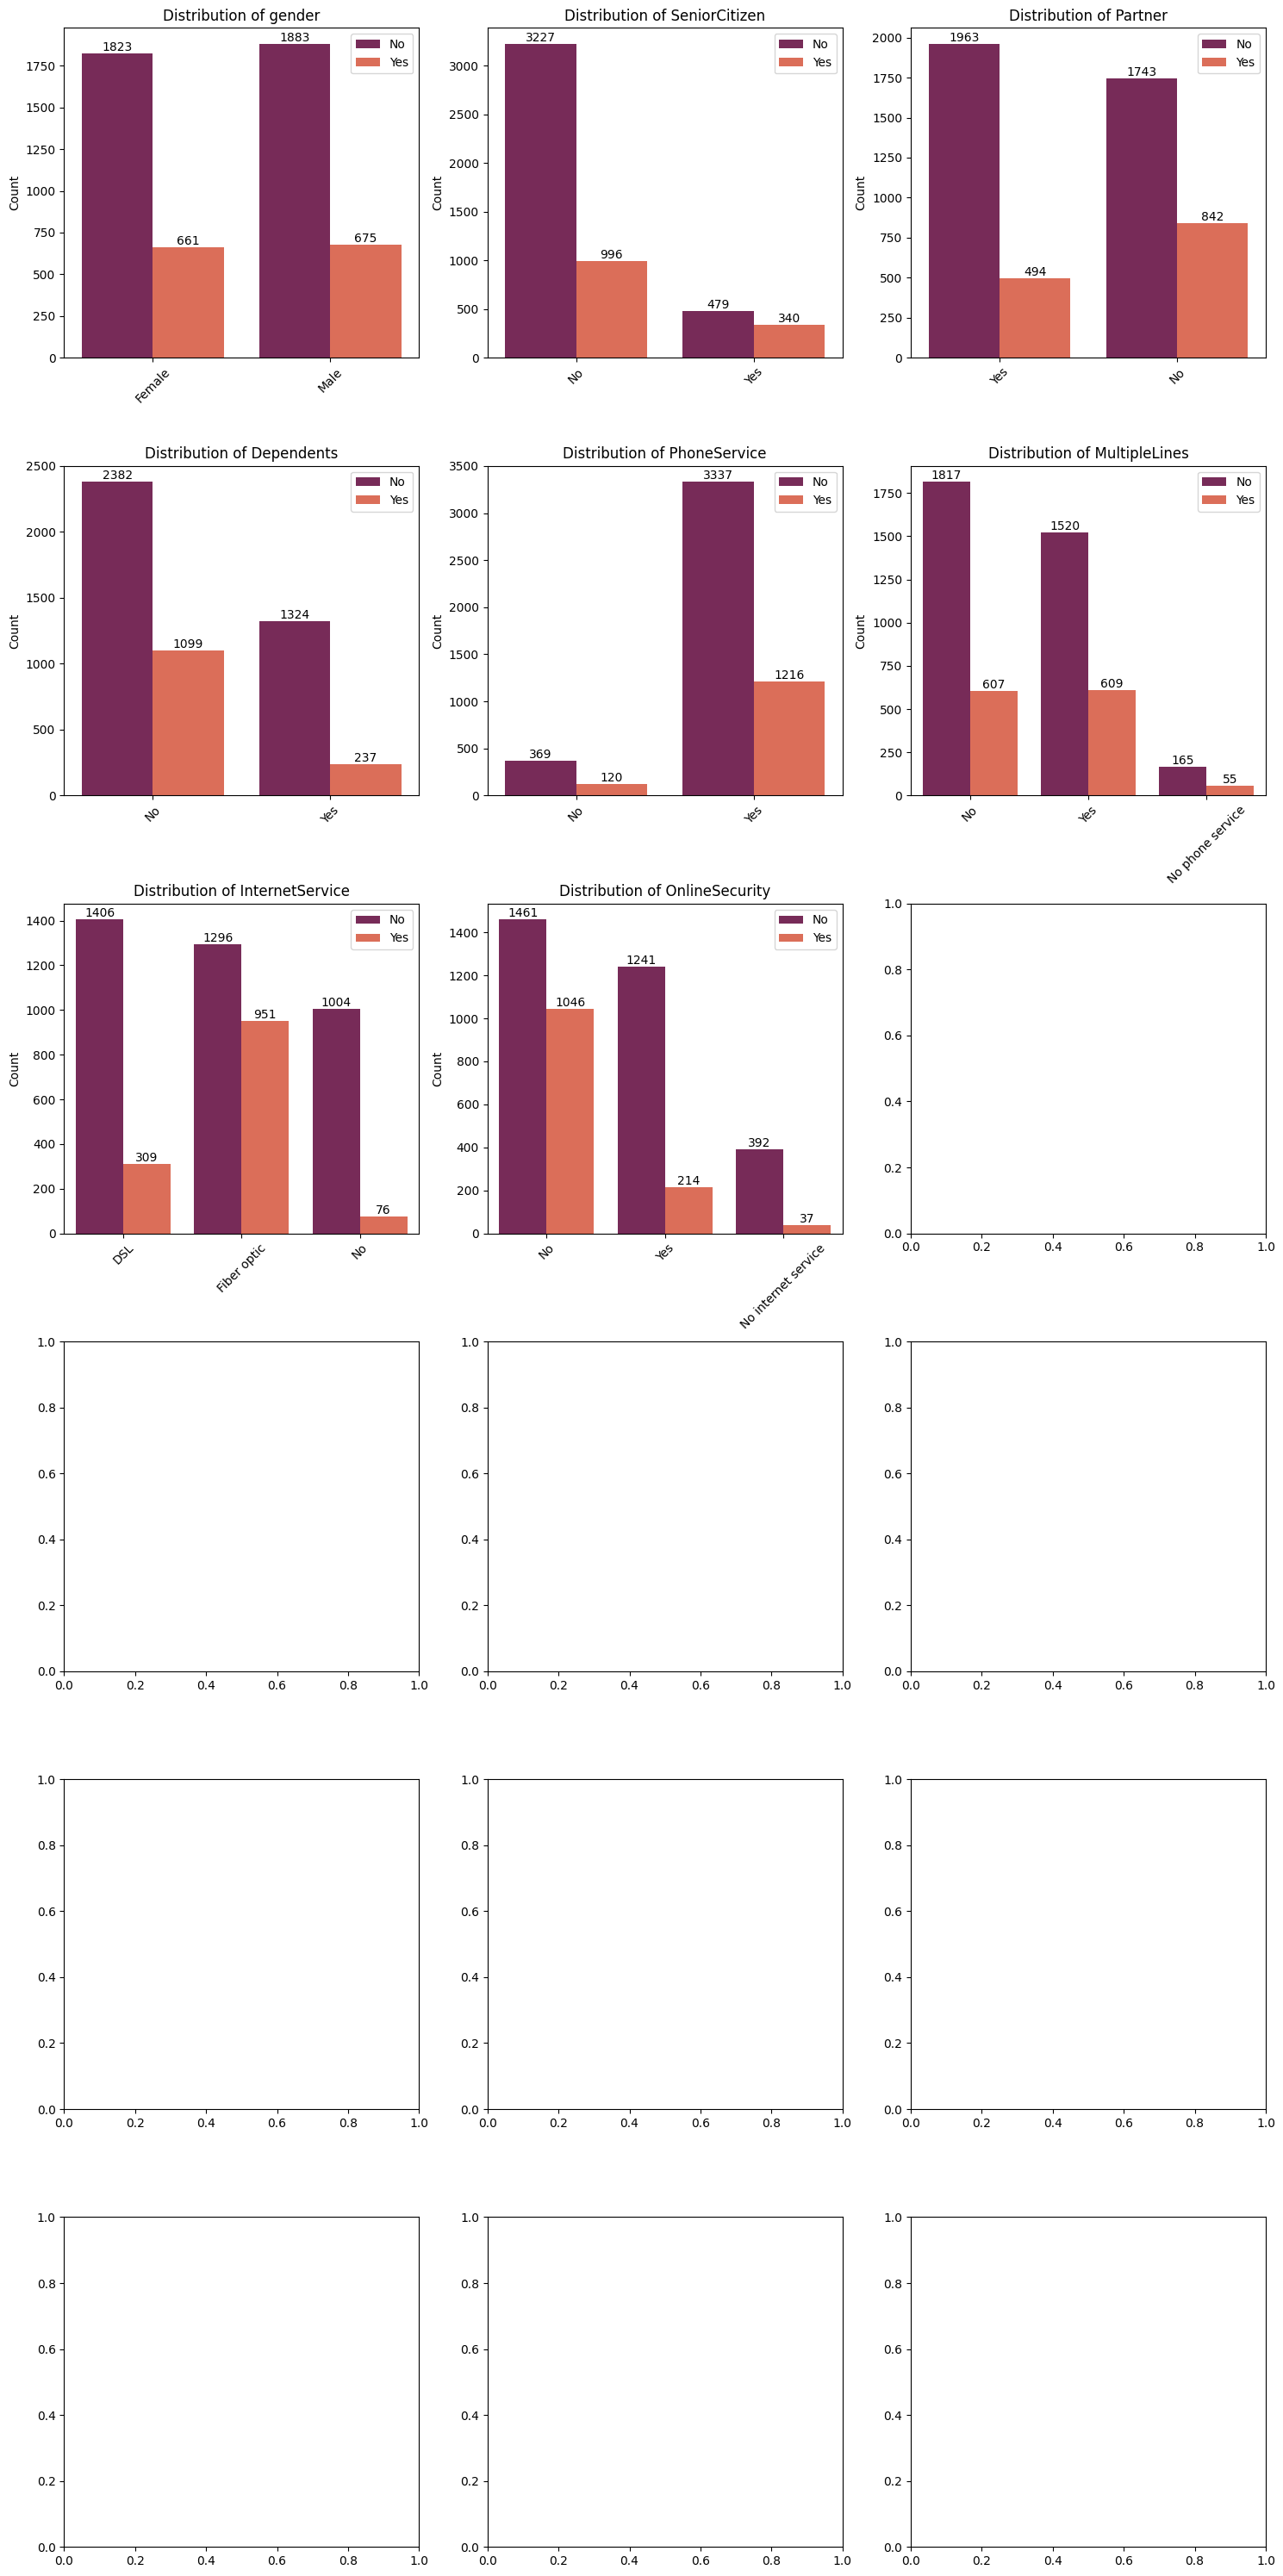

In [90]:
# plot countplot to analyze categorical columns
def categorical_distribution(df):
    cat_column = df.select_dtypes(include="object").columns
    num_plots = (len(cat_column) - 1)
    fig, axes = plt.subplots(6, 3, figsize=(15, 30))
    
    for ax, column in zip(axes.flat, cat_column[1:num_plots]):
        sns.countplot(data = df, x = column, orient = "v", palette = "rocket", hue = "Churn", ax = ax)
        for container in ax.containers:
            ax.bar_label(container)
        ax.set_title(f"Distribution of {column}")
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.legend(loc="upper right")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        plt.tight_layout()
    plt.show()
categorical_distribution(df_combined)

#### **Key Insights**:
- **Gender**:
The distribution of churn is almost equal between males and females, indicating that gender does not significantly influence churn.
- **Senior Citizens**:
A higher percentage of senior citizens tend to churn compared to non-senior citizens. This suggests that senior citizens are more likely to leave the service. This might be due to senior citizens facing challenges in adopting and using new technologies. They might also require more personalized and accessible customer support that may be unavailable.
- **Partner**:
Customers without partners have a higher churn rate than those with partners. Customers with partners might have a stronger support system, leading to higher satisfaction and stability in their service usage. This implies that having a partner is associated with reduced churn.
- **Dependents**:
Customers without dependents are more likely to churn compared to those with dependents. Customers with dependents might be more committed to maintaining their services to ensure stability for their dependents, such as ensuring internet access for children's education or entertainment. This indicates that having dependents may contribute to customer retention.
- **Phone Service**:
Customers with phone service have a higher churn rate compared to those without phone service. This might suggest that phone service users are less satisfied. Quality of service issues like Frequent call drops, poor signal quality, or limited coverage could be causing dissatisfaction
- **Multiple Lines**:
Customers with multiple lines have a higher churn rate compared to those with a single line. This may be due to complexity and cost of managing multiple lines may be cumbersome, and the associated costs may be high.
- **Internet Service**:
Fiber optic internet customers have a higher churn rate compared to DSL and customers without internet service. This might indicate issues with the fiber optic service or higher price sensitivity among these customers.
- **Online Security, Online Backup, Device Protection, Tech Support**:
Customers without these additional services are more likely to churn. This might be because customers who don't have these services may not see them as valuable or necessary.
- **Streaming TV and Movies**:
Customers who do not have streaming TV or streaming movies are more likely to churn compared to those who have these services. Customers may perceive a lack of value if they do not have access to entertainment options.
- **Contract**:
Month-to-month customers have a significantly higher churn rate compared to those with one-year or two-year contracts. This suggests that longer contract terms are effective in retaining customers.
- **Paperless Billing**:
Customers with paperless billing have a higher churn rate compared to those without paperless billing. Customers might miss payments or forget due dates without physical reminders. Therefore acummating charges.
- **Payment Method**:
Customers who use electronic checks have the highest churn rate, followed by those who use mailed checks. Bank transfer and credit card users have lower churn rates. Electronic checks and mailed checks are less convenient compared to automatic payments via bank transfer or credit card.

#### 2.3.3. Bi-variate Analysis

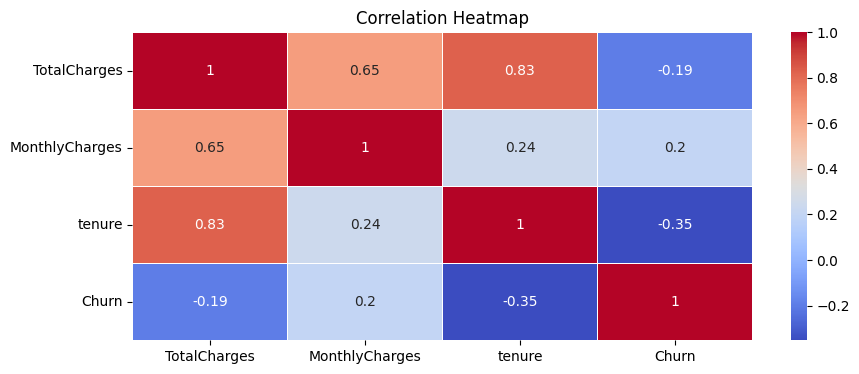

In [ ]:
# Extract all yes and no columns
df_filter = df_combined[["TotalCharges", "MonthlyCharges", "tenure", "Churn"]]
# Drop null values
df_filter.dropna(inplace = True)

# Encode categorical values in churn colum
df_filter["Churn"] = df_filter["Churn"].map({"Yes": 1, "No": 0})

# Calculate the correlation coefficients
corr = df_filter.corr()

# Set the figure size and create subplots
plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### **Key Insights**:
- tenure and TotalCharges (0.83): This correlation is a very strong positive, indicating that as tenure increases, total charges naturally tend to increase as well, reflecting accumulated charges over time.<br>
- TotalCharges and MonthlyCharges: (0.65) This value indicates a strong positive correlation, indicating that customers with higher total charges tend to also have higher monthly charges. This makes sense, as customers who use the service more will incur greater overall charges.<br>
- Churn and MonthlyCharges (0.2): The correlation between churn and monthly charges is weak and positive, indicating that as monthly charges increases, customer churn also increases.
- Churn and tenure (-0.35): The correlation between churn and tenure is weak negative, indicating that as tenure decreases, customer churn also increases

#### 2.3.4. Multi-variate Analysis

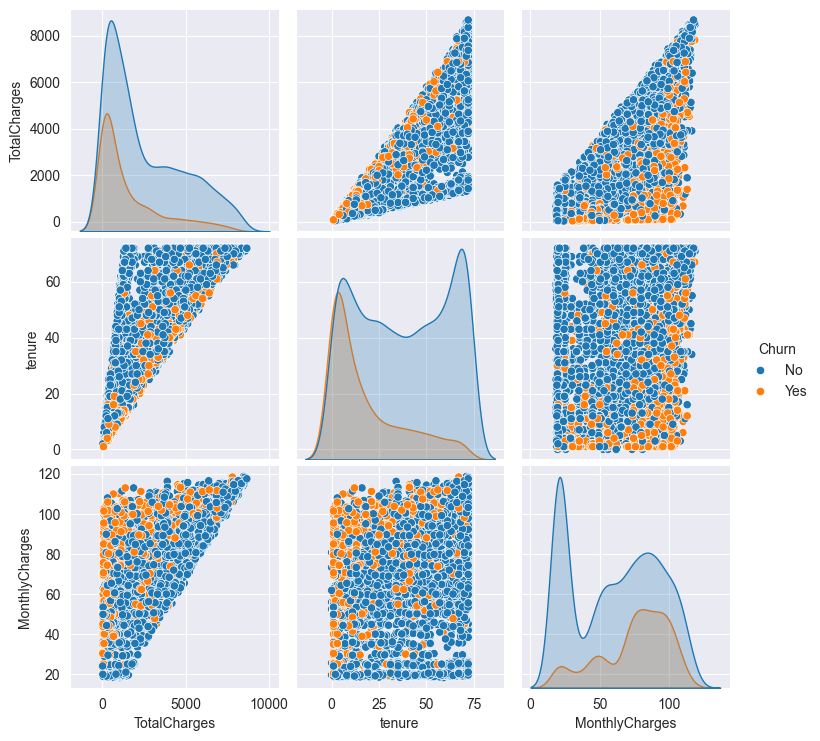

In [ ]:
# Set style
sns.set_style("darkgrid")

selected_columns = df_combined[["Churn", "TotalCharges", "tenure", "MonthlyCharges"]]

# Plot pairplot using the selected columns
sns.pairplot(selected_columns, hue = "Churn")
plt.show()

#### Observation
1. **Total Charges vs. Tenure:**
- There is a positive correlation between TotalCharges and tenure, indicating that customers who have been with the company longer have higher total charges.
- Churned customers appear throughout the tenure range but are more concentrated at lower tenure values, suggesting that customers who churn often do so earlier in their relationship with the company.
2. **Total Charges vs. Monthly Charges:**
- TotalCharges increases with MonthlyCharges, as expected.
- Churned customers are spread across the MonthlyCharges range, with a noticeable number of churns at higher MonthlyCharges.
3. **Tenure vs. Monthly Charges:**
- Customers with shorter tenure (newer customers) have churn occurrences across different levels of MonthlyCharges.
- There is a higher concentration of churn at shorter tenures, irrespective of MonthlyCharges.
4. **Distributions:**
The histograms on the diagonal show the distribution of each variable split by churn status:
- `TotalCharges`: Churned customers tend to have lower total charges.
- `Tenure`: Churned customers are more prevalent at shorter tenures.
- `MonthlyCharges`: There is a relatively higher density of churned customers at higher monthly charges, but churn occurs across all charge levels.

#### Key Insights:
- Tenure is a significant factor in churn. Customers with shorter tenure are more likely to churn.
- TotalCharges is also a relevant factor, with lower total charges associated with higher churn, likely due to shorter tenure.
- MonthlyCharges shows that higher charges might be linked to higher churn, though churn occurs across all charge levels.

#### Duplicate the dataframe to answer analytical questions;
- create a deep copy of the DataFrame, so that changes in one does not affect the other
- Name the duplicated dataframe "df_copy"

In [ ]:
# Duplicate Dataframe 
df_copy = df_combined.copy(deep = True)

# Define a function to fill null values in a DataFrame
def fill_null_values(df):
    """
    Returns a DataFrame with null values filled
    """
    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Check if the column data type is object (i.e., string or categorical)
        if df[col].dtype == "object":
            # Fill null values with the most frequent value (mode) in the column
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Fill null values with the median value in the column (for numerical columns)
            df[col] = df[col].fillna(df[col].median())
    # Return the modified DataFrame
    return df

# Apply the fill_null_values function
df_copy.pipe(fill_null_values)

# Confirm filled null values
df_copy.head().isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.4. Answer Analytical questions with visulizations

#### 2.4.1. Which customer is most likely to churn?
a) Perform statistical analysis tests for for the assumption that Churn is not influenced by customer demographics.
**Taking** ($\alpha$) = 0.05

In [ ]:
# List of variables to analyze
variables = ["gender", "SeniorCitizen", "Partner", "Dependents"]
# Target variable
target = "Churn"

# Corresponding p-values for each factor
p_values = []

# Assign the DataFrame to a variable
df = df_copy

# Iterate over the variables and create contingency tables
for variable in variables:
    # Chi-square test
    contingency_table = pd.crosstab(df[variable], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append(round(p, 4))

NameError: name 'df_copy' is not defined

In [ ]:
# Create a dataframe with the results
df = pd.DataFrame({"Variable": variables, "p-value": p_values})

# Set figure size
plt.figure(figsize = (10, 4))
# Create a bar chart
plt.barh(df["Variable"], df["p-value"])
plt.axvline(x = 0.05, color = "k", linestyle='--', label = "Threshold (p = 0.05)")
plt.title("p-values of Customer Demographics Influencing Customer Churn")
plt.xlabel("p-value")
plt.ylabel("Customer Demographics")
plt.legend()

# Annotate the bars
for i, (variable, p_value) in enumerate(zip(df["Variable"], df["p-value"])):
    plt.text(p_value, i, f"{p_value:.2f}", va="center", ha="left", fontsize=10)

plt.show()

ValueError: All arrays must be of the same length

**Observations:**
- **gender vs Churn**: We fail to reject the assumption that gender has no significant influence on churn. Having a p-value of 0.8765 which is greater than 0.05. Hence, there is no significant association between Gender and Churn
- **SeniorCitizen vs Churn**: We reject the assumption that SeniorCitizen has no significant influence on churn. Having a p-value of 0.0000 which is less than 0.05 indicates a very strong evidence of association between SeniorCitizen and Churn. Hence, there is a significant association between SeniorCitizen and Churn
- **Partner vs Churn**: We reject the assumption that Partner has no significant influence on churn. Having a p-value of 0.0000 which is less than 0.05 indicates strong evidence of association between Partner and Churn. Hence, there is a significant association between Partner and Churn
- **Dependents vs Churn**: We reject the assumption that Dependents has no significant influence on churn. Having a p-value of 0.0000 which is less than 0.05 indicates a very strong evidence of association between Dependents and Churn. Hence, there is a significant association between Dependents and Churn

b) Calculate the churn rate for each gender

   gender  Churn  BreakDown  Rate (%)
0  Female  False       1079     43.44
1  Female   True        384     15.46
2  Female     No        744     29.95
3  Female    Yes        277     11.15
4    Male  False       1141     44.59
5    Male   True        396     15.47
6    Male     No        743     29.03
7    Male    Yes        279     10.90


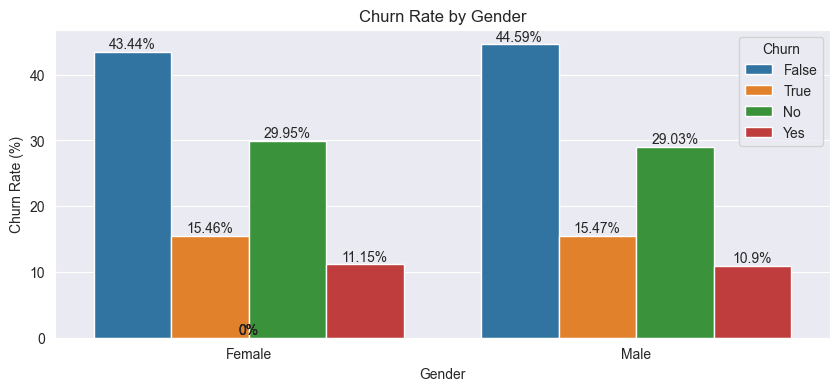

In [ ]:
# Group the data by "gender" and "Churn" columns
grouped_data1 = df_copy.groupby(["gender", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each gender group:
grouped_data1["Rate (%)"] = grouped_data1.groupby("gender")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data1)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize=(10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data=grouped_data1, x="gender", y="Rate (%)", hue="Churn")
# Set the title of the plot
plt.title("Churn Rate by Gender")
# Set the labels for the x-axis and y-axis
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha="center")

# Display the plot
plt.show()

**Observations:**
- The dataset shows a near equal distribution of males and females, with a slight inclination towards males compared to females.
- Females exhibit a marginally higher Churn rate 26.61% compared to males 26.38%. A significant majority of customers approximately 73% are retained, while around 26% have churned.
- Males have a slightly higher retention rate 73.62% compared to females 73.39%.

c) Calculate the churn rate for each SeniorCitizen

  SeniorCitizen  Churn  BreakDown  Rate (%)
0         False  False       1937     76.71
1         False   True        588     23.29
2          True  False        283     59.58
3          True   True        192     40.42
4            No     No       1291     75.99
5            No    Yes        408     24.01
6           Yes     No        196     56.98
7           Yes    Yes        148     43.02


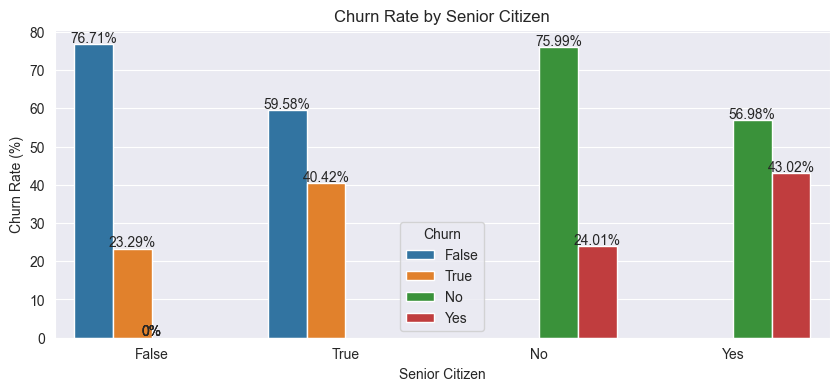

In [ ]:
# Group the data by "SeniorCitizen" and "Churn" columns
grouped_data2 = df_copy.groupby(["SeniorCitizen", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each SeniorCitizen group:
grouped_data2["Rate (%)"] = grouped_data2.groupby("SeniorCitizen")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data2)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize=(10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data=grouped_data2, x="SeniorCitizen", y="Rate (%)", hue="Churn")
# Set the title of the plot
plt.title("Churn Rate by Senior Citizen")
# Set the labels for the x-axis and y-axis
plt.xlabel("Senior Citizen")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha="center")

# Display the plot
plt.show()

**Observations:**
- The majority of customers (76.42%) are non-Senior Citizens who are retained.
- A significant proportion 23.58% of non-Senior Citizens have churned.
- Among Senior Citizens, 58.49% retained, while 41.51% churned.


d) Calculate the churn rate for customers with Partners

In [ ]:
# Group the data by "SeniorCitizen" and "Churn" columns
grouped_data3 = df_copy.groupby(["Partner", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each SeniorCitizen group:
grouped_data3["Rate (%)"] = grouped_data3.groupby("Partner")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data3)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize=(10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data=grouped_data3, x="Partner", y="Rate (%)", hue="Churn")
# Set the title of the plot
plt.title("Churn Rate by Customers with Partners")
# Set the labels for the x-axis and y-axis
plt.xlabel("Partner")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha="center")

# Display the plot
plt.show()

NameError: name 'df_copy' is not defined

**Observations:**
- The majority of customers with a Partner (79.90%) are retained.
- A significant proportion of customers without a Partner (32.57%) have churned.
- Among customers with a Partner, 20.10% have churned, while 67.43% of customers without a Partner are retained.

e) Calculate the churn rate for customers with Dependents

  Dependents  Churn  BreakDown  Rate (%)
0      False  False       1427     68.94
1      False   True        643     31.06
2       True  False        793     85.27
3       True   True        137     14.73
4         No     No        956     67.71
5         No    Yes        456     32.29
6        Yes     No        531     84.15
7        Yes    Yes        100     15.85


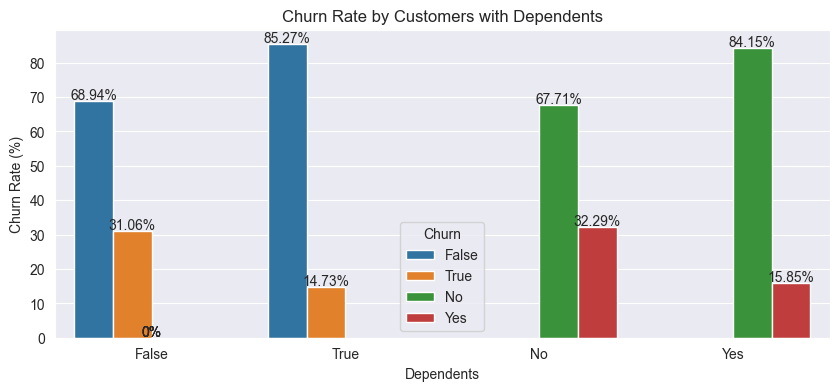

In [ ]:
# Group the data by "SeniorCitizen" and "Churn" columns
# print(df_copy.columns)
grouped_data4 = df_copy.groupby(["Dependents", "Churn"])["Churn"].count().rename("BreakDown").reset_index()
# Calculate the Churn Rate for each SeniorCitizen group:
grouped_data4["Rate (%)"] = grouped_data4.groupby("Dependents")["BreakDown"].transform(lambda x: round(x/x.sum()*100, 2))
print(grouped_data4)

# Set style
sns.set_style("darkgrid")
# Create a new figure with a specified size
plt.figure(figsize = (10, 4))

# Generate a bar plot using Seaborn
sns.barplot(data = grouped_data4, x = "Dependents", y = "Rate (%)", hue = "Churn")
# Set the title of the plot
plt.title("Churn Rate by Customers with Dependents")
# Set the labels for the x-axis and y-axis
plt.xlabel("Dependents")
plt.ylabel("Churn Rate (%)")

# Iterate over each bar in the plot
for bar in plt.gca().patches:
    # Get the height of the bar (Churn Rate value)
    height = bar.get_height()
    # Add a text label above each bar with the Churn Rate value
    plt.gca().text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height) + "%", ha = "center")

# Display the plot
plt.show()

**Observations:**
- From the plot, 68.44% of customers without Dependents are retained. A significant proportion of customers without Dependents (31.56%) have churned.
- Among customers with Dependents, 84.82% have retained, while 15.18% have churned.

**Key Insights**:
1. **Gender vs Churn**:<br> The Chi-Square test showed no significant association between gender and Churn (p-value = 0.8765, Chi-Square statistic = 0.024), which is consistent with the bar plot showing virtually identical Churn rates across both genders (26.61% vs 26.38%). 

2. **SeniorCitizen vs Churn**:<br> The test revealed a strong association between SeniorCitizen status and Churn (p-value < 0.05, Chi-Square statistic = 112.3851), indicating that Senior Citizens are more likely to churn. The bar plot confirms this, with a significantly higher Churn rate among Senior Citizens (41.51%) compared to non-Senior Citizens (23.58%).

3. **Partner vs Churn**:<br> The Chi-Square test indicated a significant association between having a Partner and Churn (p-value < 0.05, Chi-Square statistic = 100.048), suggesting that customers with a Partner are less likely to churn. The bar plot supports this, showing a lower Churn rate among customers with a Partner (20.10%) compared to those without partners (32.57%).

4. **Dependents vs Churn**:<br> The Chi-Square test uncovered a significant association between having Dependents and Churn (p-value < 0.05, Chi-Square statistic = 147.653), indicating that customers with Dependents are less likely to churn. The bar plot confirms this, with a lower Churn rate among customers with Dependents (15.18%) compared to those without dependents (31.56%).

**Conclusion**:<br>

Customers who possess any of the following characteristics are at a higher risk of churning:<br>
SeniorCitizen status, not having a Partner, or not having Dependents.<br>
Additionally, customers who cumulatively possess all three characteristics are likely to be at the highest risk of churning.



#### 2.4.2. Identify which service is associated with customer churning
a) Perform statistical test on services presumed to be associated with customer churning

In [ ]:
# List of variables to analyze
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
             "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "InternetService"]
# Target variable
target = "Churn"

# Corresponding p-values for each factor
p_values = []

# Assign the DataFrame to a variable
df = df_copy

# Iterate over the variables and create contingency tables
for service in services:
    # Chi-square test
    contingency_table = pd.crosstab(df[service], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append(round(p, 4))

b) Visualise the test results with  horizontal bar plot

In [ ]:
# Create a dataframe with the results
df = pd.DataFrame({"Variable": services, "p-value": p_values})

# Set figure size
plt.figure(figsize = (10, 5))
# Set style
sns.set_style("darkgrid")

# Create a bar chart
plt.barh(df["Variable"], df["p-value"])
plt.axvline(x = 0.05, color = "k", linestyle='--', label = "Threshold (p = 0.05)")
plt.title("p-values of Services Influencing Customer Churn")
plt.xlabel("p-value")
plt.ylabel("Services")
plt.legend()

# Annotate the bars
for i, (variable, p_value) in enumerate(zip(df["Variable"], df["p-value"])):
    plt.text(p_value, i, f"{p_value:.2f}", va="center", ha="left", fontsize=10)

plt.show()

NameError: name 'services' is not defined

**Observations**:<br>
1. The Chi-square test indicates a statistically significant association between the following factors and customer churn: MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, InternetService, and PaymentMethod. Each of these factors has a p-value of 0.0000, which is less than the significance level of 0.05. This suggests that these factors are strongly associated with customer churn.
2. Conversely, there is no significant association between PhoneService and churn, as indicated by a p-value of 0.33. This suggests that customers with the PhoneService subscription are not more likely to churn compared to those without this service.

#### 2.4.3. What internet services is most likely to have the most loyal customers?

Churn               False      True        No       Yes
InternetService                                        
DSL              0.486880  0.099708  0.332945  0.080466
Fiber optic      0.343861  0.253559  0.233096  0.169484
No               0.566667  0.036111  0.362963  0.034259


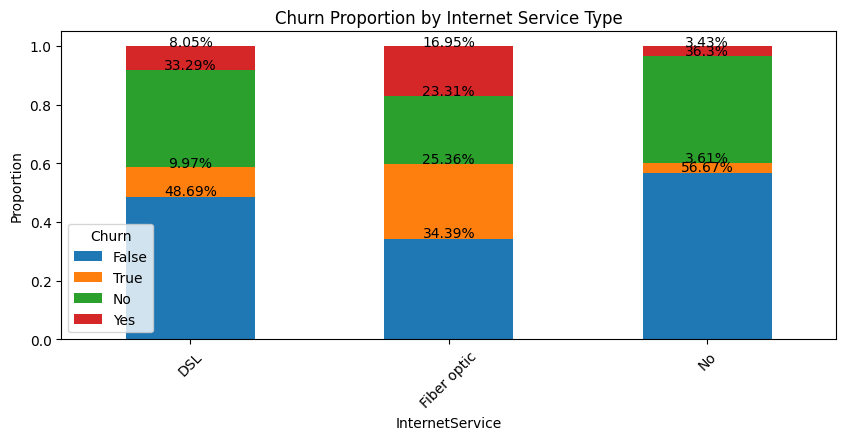

In [ ]:
# Calculate churn rates by internet service type
internet_service_churn_rate = df_copy.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack()
print(internet_service_churn_rate)

# Visualization
internet_service_churn_rate.plot(kind="bar", stacked = True, rot = 45, figsize = (10, 4))
plt.title("Churn Proportion by Internet Service Type")
plt.ylabel("Proportion")

# Add data point to corresponding bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    width = bar.get_width()
    x, y = bar.get_xy()
    plt.annotate(f"{round(float(height)*100, 2)}%", (x + width/2, y + height*1.01), ha = "center")

plt.show()

**Observations**:
- The Chi-square test indicates a statistically significant association between InternetService and Churn, with a p-value of 0.0000, which is less than the significance level of 0.05. This suggests that the type of InternetService is likely to influence customer retention.
- DSL subscribers have a lower Churn rate (0.180175 or 18.02%), which is lower than the overall Churn rate.
- Fiber optic subscribers have a higher Churn rate (0.423043 or 42.30%), which is higher than the overall Churn rate.
- Customers without InternetService have a very low Churn rate (0.070370 or 7.04%), which is significantly lower than the overall Churn rate.

**Insights**:<br>
- InternetService type is a significant factor in Churn, with DSL subscribers being more loyal or satisfied, and fiber optic subscribers being more prone to Churn.
- Customers without InternetService may be less reliant on the company, indicating a lower risk of Churn.


#### 2.4.4. What could be the reason behind a particular internet service recording high churn rate?

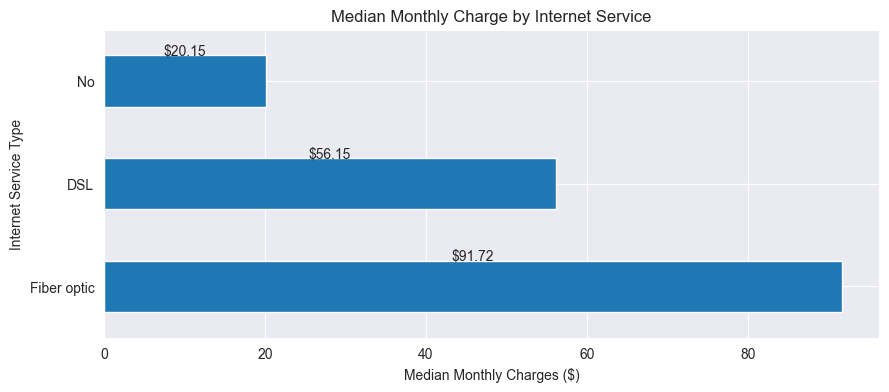

In [ ]:
# Calculate the median monthly charges grouped by Internet service type
monthly_charge_by_median = df_copy.groupby(["InternetService"])["MonthlyCharges"].median().sort_values(ascending=False)

# Set style for the seaborn plots
sns.set_style("darkgrid")
# Plot the median monthly charges as a horizontal bar chart
monthly_charge_by_median.plot(kind="barh", figsize=(10, 4))

# Label the axis
plt.xlabel("Median Monthly Charges ($)")
plt.ylabel("Internet Service Type")
plt.title("Median Monthly Charge by Internet Service")

# Annotate the bars with the median values
for i, bar in enumerate(plt.gca().patches):
     # Get the height of the bar
    height = bar.get_height()
    # Get the width of the bar (median value)
    width = bar.get_width()
    # Get the x and y coordinates of the bar
    x, y = bar.get_xy()        
    # Annotate the bar with the median value, positioned slightly above the bar
    plt.annotate(f"${round(float(width), 2)}", (x + width/2, y + height*1.01), ha="center")

# Display the plot
plt.show()


**Observations**:<br>
- The median monthly charges vary significantly across different InternetService types.
- Fiber optic subscribers pay the most: The median monthly charge for fiber optic subscribers ($91.72) is significantly higher than the other two groups.
- DSL subscribers pay moderately: The median monthly charge for DSL subscribers ($56.15) is lower than fiber optic but higher than those without InternetService.
- Customers without InternetService pay the least: The median monthly charge for customers without InternetService ($20.15) is the lowest among the three groups.

#### 2.4.5. How does tenure influence customer churn?
Plot line chart to visualize churn variation against turner

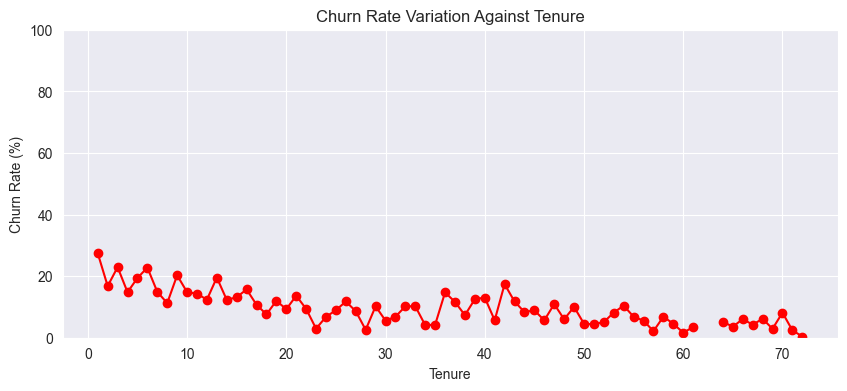

In [ ]:
# Calculate churn rates by tenure
tenure_churn_rate = (df_copy.groupby("tenure")["Churn"].value_counts(normalize=True).unstack()*100)

# Plot a line chart of churn
plot = tenure_churn_rate["Yes"].plot(kind = "line", figsize = (10, 4), color = "red", marker = "o")
# Adding title and labels
plt.xlabel("Tenure")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate Variation Against Tenure")
# Set y-axis limit between 0 and 100
plot.set_ylim(0, 100)

# Display the plot
plt.show()


**Observations**:<br>
- The churn rate is highest for customers with very low tenure (around 0 to 1 months), reaching above 60%.
- There is a general decreasing trend in the churn rate as tenure increases. Customers with longer tenures tend to churn less.
- Despite the overall decreasing trend, there are fluctuations in the churn rate at various tenure points. This indicates that while tenure generally reduces churn, other factors might influence churn rates at specific intervals.

### 2.5. Hypothesis Testing
**Null Hypothesis (Ho)**: The total amount charged to a customer has no statistical significant influence on wether the customer will churn or not 

**Alternate Hypothesis (Ha)**: The total amount charged to a customer has statistical significant influence on whether the customer will churn or not.<br>
**Take ($\alpha$)** = 0.05


In [ ]:
# Select the "TotalCharges" values where the customer churned (Churn == "Yes")
churn_yes = df_copy[df_copy["Churn"] == "Yes"]["TotalCharges"]
# Select the "TotalCharges" values where the customer did not churn (Churn == "No")
churn_no = df_copy[df_copy["Churn"] == "No"]["TotalCharges"]
# Perform the Mann-Whitney U test to compare the distributions of TotalCharges between churned and non-churned customers
U, p = mannwhitneyu(churn_yes, churn_no)

# Print the results of the Mann-Whitney U test
print(f"Mann-Whitney U statistic: {U}")
print(f"p-value: {p:.4f}")
print("\nSince the p-value is less than the significance level 0.05, we reject the null hypothesis.")
print(f"This indicates that TotalCharges has significant influence on customer churn")

Mann-Whitney U statistic: 286212.0
p-value: 0.0000

Since the p-value is less than the significance level 0.05, we reject the null hypothesis.
This indicates that TotalCharges has significant influence on customer churn


**Conclusion**:<br> 
- from the correlation heatmap, the correlation coefficient TotalCharge and Churn is negative, indicating a weak inverse relationship between TotalCharges and Churn. As TotalCharges decrease, the likelihood of Churn increases. This could indicate early churn.
- The correlation coefficient is relatively small (0.19), suggesting that the relationship is very weak.<br> However, a p-value of 0, indicates that the observed correlation is statistically significant. This means that the observed relationship is unlikely to be due to chance.


## Summary
Based on the analysis, the key factors affecting churn have been grouped into two main categories:
#### 1. Customer Demographics<br>
Customers that are likely to churn often possess certain demographic characteristics:
- **Senior Citizens**: The churn rate for senior citizens is significantly higher (41.51%) compared to non-senior citizens (23.58%). This might be due to senior citizens facing challenges in adopting and using new technologies. They might also require more personalized and accessible customer support that may be unavailable.
- **Partner**:
Customers without partners have a higher churn rate than those with partners. Customers with partners might have a stronger support system, leading to higher satisfaction and stability in their service usage. This implies that having a partner is associated with reduced churn.
- **Dependents**:
Customers without dependents are more likely to churn compared to those with dependents. Customers with dependents might be more committed to maintaining their services to ensure stability for their dependents, such as ensuring internet access for children's education or entertainment. This indicates that having special offers for dependents will increase customer retention rate.
#### 2. Services and Charges<br>
Several aspects related to the services provided and the associated charges significantly influence the churn rate
- **Tenure**: The churn rate is highest among customers with very low tenure (0-1 months), reaching above 60%. As tenure increases, the churn rate generally decreases, indicating that efforts to engage customers early in their tenure are crucial. This might be due to negative first impressions, such as installation issues, poor customer service, or unmet expectations. Also, some customers may join with the intention of only using the service for a short period, such as during a promotion or trial period
- **Monthly Charges**: Higher monthly charges correlate with higher churn rates. Frequent service disruptions or poor service quality can make high monthly charges seem unjustifiable. Therefore, prompting customers to leave.
- **Total Charges**: Lower total charges, which are often due to shorter tenure, are associated with higher churn rates. This highlights the importance of ensuring customer satisfaction early on to encourage long-term retention. Though the correlation between total charges and churn is very weak but gives insights on how to increase customer retention.
- **Internet Service Type**: Fiber optic internet users have a significantly higher churn rate (42.30%) compared to DSL users (18.02%) and those without internet service (7.04%). This could be due to Fiber optic having technical issues or outages affecting customer satisfaction.
- **Contract Type**: Month-to-month contracts are associated with higher churn rates, as they offer customers more flexibility to leave compared to longer-term contracts. Customers with longer-term contracts tend to stay longer, reducing churn.
- **Phone Service**:
Customers with phone service have a higher churn rate compared to those without phone service. This might suggest that phone service users are less satisfied. Quality of service issues like Frequent call drops, poor signal quality, or limited coverage could be causing dissatisfaction
- **Multiple Lines**:
Customers with multiple lines have a higher churn rate compared to those with a single line. This may be due to complexity and cost of managing multiple lines may be cumbersome, and the associated costs may be high.
- **Online Security, Online Backup, Device Protection, Tech Support**:
Customers without these additional services are more likely to churn. This might be because customers who don't have these services may not see them as valuable or necessary.
- **Streaming TV and Movies**:
Customers who do not have streaming TV or streaming movies are more likely to churn compared to those who have these services. Customers may perceive a lack of value if they do not have access to entertainment options.
- **Paperless Billing**:
Customers with paperless billing have a higher churn rate compared to those without paperless billing. Customers might miss payments or forget due dates without physical reminders. Therefore accruing charges.
- **Payment Method**:
Customers who use electronic checks have the highest churn rate, followed by those who use mailed checks. Bank transfer and credit card users have lower churn rates. Electronic checks and mailed checks are less convenient compared to automatic payments via bank transfer or credit card.

## Recommendations for Improving Customer Retention
Based on the analysis of key factors influencing churn, tailored recommendations are proposed to enhance customer retention:

#### 1. Customer Demographics
- **Senior Citizens**:
    - Offer simplified interfaces and provide easy-to-understand guides and tutorials.
    - Introduce special discounts or loyalty programs for senior citizens to make the service more affordable.
    - Create a dedicated customer support team trained to assist senior citizens with their specific needs.
- **Partner Status**:
    - Develop personalized offers and discounts for single customers to encourage long-term commitment and satisfaction.
    - Implement surveys or feedback mechanisms to understand the preferences and concerns of single customers, adapting services accordingly.
- **Dependents**:
    - Create targeted marketing campaigns specifically designed for customers without dependents, highlighting the benefits of your services that resonate with this demographic.
    - Offer streamlined service plans that cater to the needs of customers without dependents, such as single-user plans or flexible pricing options.
#### 2. Services and Charges
- **Tenure**:
    - Enhance the onboarding process with personalized welcome messages, tutorials, and proactive customer support to build early satisfaction and loyalty.
    - Highlight additional benefits and rewards that accrue over time, reinforcing the decision to stay with the service provider.
    - Collect feedback from new customers to identify and quickly resolve common issues.
- **Monthly Charges**:
    - Regularly review pricing to ensure it remains competitive within the market.
    - Invest in improving service quality to ensure customers feel they are receiving value for their money.
- **Total Charges**:
    - Proactively address customer concerns and ensure satisfaction during the initial service period to mitigate churn risks associated with lower total charges.
- **Internet Service Type**:
    - Maintain high standards of service quality for all internet service types, promptly addressing technical issues and improving reliability for fiber optic users.
    - Review and adjust pricing strategies for fiber optic services to remain competitive in the market while ensuring profitability and customer satisfaction.
    - Implement robust feedback mechanisms to gather insights from fiber optic users, enabling continuous service improvements and personalized responses.
- **Contract Type**:
    - Introduce attractive incentives, such as discounts or enhanced service features, for customers opting for longer-term contracts to promote loyalty and reduce churn.
    - Offer flexibility in contract terms, allowing customers to adjust plans or upgrade services, enhancing satisfaction and retention rates.
- **Phone Service**:
    - Conduct regular maintenance and upgrades to ensure better call quality and coverage.
    - Create attractive bundles that include phone service with other services at a discounted rate.
    - Collect and act on customer feedback to identify and address specific issues with the phone service.
- **Multiple Lines**:
    - Offer easy-to-use management tools for multiple lines.
    - Provide discounts or incentives for customers with multiple lines to reduce the financial burden.
- **Online Security, Online Backup, Device Protection, Tech Support**:
    - Bundle these services with core offerings and highlight their benefits.
    - Provide information on the importance of these services in protecting their data and devices.
- **Streaming TV and Movies**:
    - Offer packages that include streaming TV and movies at a competitive price.
    - Highlight exclusive content and features available through the streaming services.
- **Paperless Billing**:
    - Send regular email or SMS reminders for upcoming payments to prevent charges accruing
    - Emphasize the environmental and convenience benefits of paperless billing.
- **Payment Method**:
    - Encourage customers to switch to bank transfer or credit card payments by offering incentives or discounts.
Simplify payment process: Make the process for setting up automatic payments easy and straightforward.

## 3. Data Preparation 

#### Split data into X and y

In [ ]:
# # Drop 1 null value present in the churn column
print(df_combined.columns)
df_combined.dropna(subset = ["Churn"], inplace = True)
df_combined.drop(df[type(df["Dependents"])==bool])
print(df_combined)
# Select all columns except Churn and customerID and assign them to the feature matrix X
X = df_combined.drop(["Churn", "customerID"], axis = 1)
# Select only the "Churn" column and assign it to the target vector y
y = df_combined["Churn"]
# print(X)

# Randomly select 80% of observations to be the training data and 20% of abservations into the eval (evaluation) data
X_train, X_eval, y_train, y_eval = train_test_split(X, y, train_size = 0.8, random_state = 42,stratify=y)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


KeyError: 'Dependents'

In [ ]:
X_train.head()

NameError: name 'X_train' is not defined

In [ ]:
y_train.head()

NameError: name 'y_train' is not defined

In [ ]:
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((4033, 19), (4033,), (1009, 19), (1009,))

#### Separate train dataset into  numerical from categorical variables

In [ ]:
# Select numerical features
X_train_num = X_train.select_dtypes("number")
# Select categorical features
X_train_cat = X_train.select_dtypes("object")

NameError: name 'X_train' is not defined

In [ ]:
X_train_num.head()

NameError: name 'X_train_num' is not defined

In [ ]:
X_train_cat.head()

NameError: name 'X_train_cat' is not defined

#### Encode the target variable (y)

In [ ]:
# Instantiate label encoder
encode = LabelEncoder()

# Encode y_train data
y_train_encoded = encode.fit_transform(y_train)
# Encode y_eval data
y_eval_encoded = encode.transform(y_eval)

NameError: name 'y_train' is not defined

In [ ]:
# Print preview of ecnoded data
print(f"Preview of encoded y_train: {y_train_encoded[:5]}\nPreview of encoded y_eval (evaluation): {y_eval_encoded[:5]}")

NameError: name 'y_train_encoded' is not defined

#### Group X dataset by categorical features and numerical features

In [ ]:
# Select column names with numerical features
numerical_features = list(X.select_dtypes("number").columns)
# Select column names with categorical features
categorical_features = list(X.select_dtypes("object").columns)

#### Prepare a Pipeline

In [ ]:
# Prepare numerical Pipeline for models that assume normally distributed data
num_pipeline = Pipeline(steps = [("numerical_imputer", SimpleImputer(strategy = "median")),
                                ("scaler", RobustScaler()),
                                ("quantile_transform", QuantileTransformer(output_distribution = "normal", random_state = 0))])

# Prepare categorical Pipeline for models that require encoding of categorical features
cat_pipeline = Pipeline(steps = [("categorical_imputer", SimpleImputer(strategy = "most_frequent")),
                                ("encoder", OneHotEncoder(handle_unknown = "ignore"))])

# Create columntransformer for models that assume normality and require encoding of categorical features
preprocessor = ColumnTransformer(transformers = [("num_pipeline", num_pipeline, numerical_features),
                                                 ("cat_pipeline", cat_pipeline, categorical_features)])

## 4. Modelling
In this analysis, we aim to explore the predictive power of six machine learning algorithms
- Support Vector Machine
- Decision Tree
- K-Nearest Neighbor
- Logistic Regression
- Random Forest
- Gradient Boosting Classifier<br>

These algorithms were chosen for their diverse strengths and abilities to handle different types of data and relationships. By applying these algorithms, we seek to identify the most effective model for predicting churn and gain insights into the underlying patterns and relationships in the data. We will evaluate the performance of each algorithm using metrics such as accuracy, precision, recall, and F1-score, ROC curve and compare their results to determine the best approach for our problem.

### 4.1. Modelling with imbalance data

In [ ]:
# Instantiate models
models = [
    ("svm", SVC(probability = True, random_state = 42)),
    ("Decision_Tree", DecisionTreeClassifier(random_state=0)),
    ("KNN", KNeighborsClassifier(n_neighbors=15)),
    ("Logistic_Regression", LogisticRegression(max_iter = 1000, random_state=0)),
    ("Random_Forest", RandomForestClassifier(n_estimators=100)),
    ("Gradient_Boosting", GradientBoostingClassifier(random_state=0))]

#### 4.1.1. Model Evaluation

In [ ]:
# All pipelines storage dictionary
all_pipelines = {}
# All confusion matrix storage dictionary
all_cm_imb = {}
# Creat a metrics dataframe
metrics_df = pd.DataFrame(columns=["model_name", "accuracy", "precision", "recall", "f1score"])

for model_name, classifier in models:
    # Creating final pipeline
    final_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("classifier", classifier)
                                     ])

    # Fit data to final pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = final_pipeline

    # Predicting
    y_pred = final_pipeline.predict(X_eval)

    # Create confusion matrix
    cm_imb = confusion_matrix(y_eval_encoded, y_pred)
    all_cm_imb[model_name] = cm_imb

    # Create a classification report
    report_imb = classification_report(y_eval_encoded, y_pred, output_dict = True)
    # Extract metrics of interest from the classification report
    accuracy = report_imb["accuracy"]
    precision = report_imb["weighted avg"]["precision"]
    recall = report_imb["weighted avg"]["recall"]
    f1score = report_imb["weighted avg"]["f1-score"]

    # Create a DataFrame for extracted metrics
    metrics_df.loc[len(metrics_df)] = [model_name, accuracy, precision, recall, f1score]
metrics_df.sort_values(by = "f1score", ascending = False)


NameError: name 'models' is not defined

### Key Insights
- **Gradient Boosting**: This model appears to be the best performer based on a balance of precision (0.804) and recall (0.811). It can accurately identify true churned customers (precision) and capture a good portion of actual churn cases (recall).<br>
- **SVM, Logistic Regression, KNN**: These models show similar performance with slightly lower precision and recall compared to Gradient Boosting. They can still be good options, but Gradient Boosting might be a better choice due to its slight edge in handling imbalanced data.<br>
- **Random Forest, Decision Tree**: These models have the lowest precision and recall scores. They might struggle to differentiate between churned and non-churned customers in the imbalanced data.

AUC-ROC curve

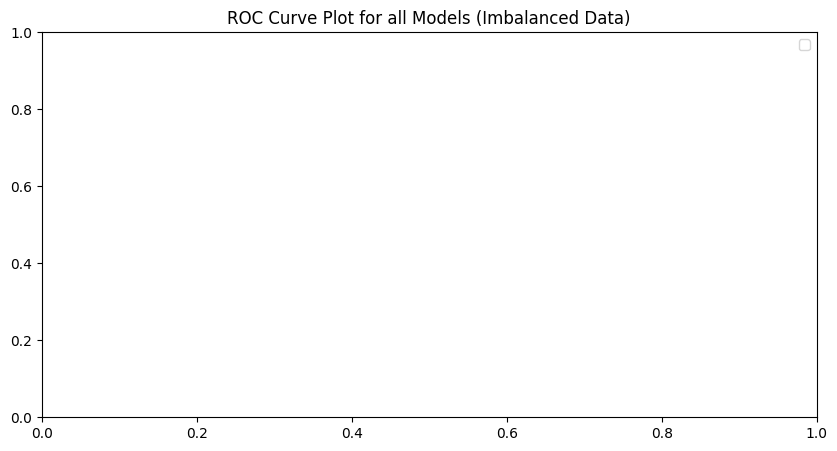

In [ ]:
# Plot roc_curves
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
all_roc_data = {}

for model_name, pipeline in all_pipelines.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    roc_auc = auc(fpr,tpr)
    roc_data = pd.DataFrame({"False Positive Rate": fpr, "True Positive Rate": tpr, "Threshold": thresholds})
    all_roc_data[model_name] = roc_data
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    ax.plot([0, 1], [0, 1], "k--")
    
    # Label axis and title
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve Plot for all Models (Imbalanced Data)")
plt.legend()
plt.show()

### Key Insights
The curves for all models (SVM, Decision Tree, KNN, Logistic Regression, Random Forest, and Gradient Boosting) are above the diagonal line, indicating all models can differentiate the target classes better than random guessing.

Model Comparison:
- **Gradient Boosting** and **Logistic Regression** appear to be the top performers based on their curves. They have the highest AUC (Area Under the Curve) values, which signifies better performance in distinguishing ironic and non-ironic text.
- **SVM**, **Random Forest**, and **KNN** follow with low AUC values, suggesting a weak ability to distinguish the classes compared to Gradient Boosting and Logistic Regression.
- **Decision Tree** also follows with the lowest AUC values, indicating that its weakest ability to distinguish to distinguish between the target classes 

Confusion Matrix for imbalanced data

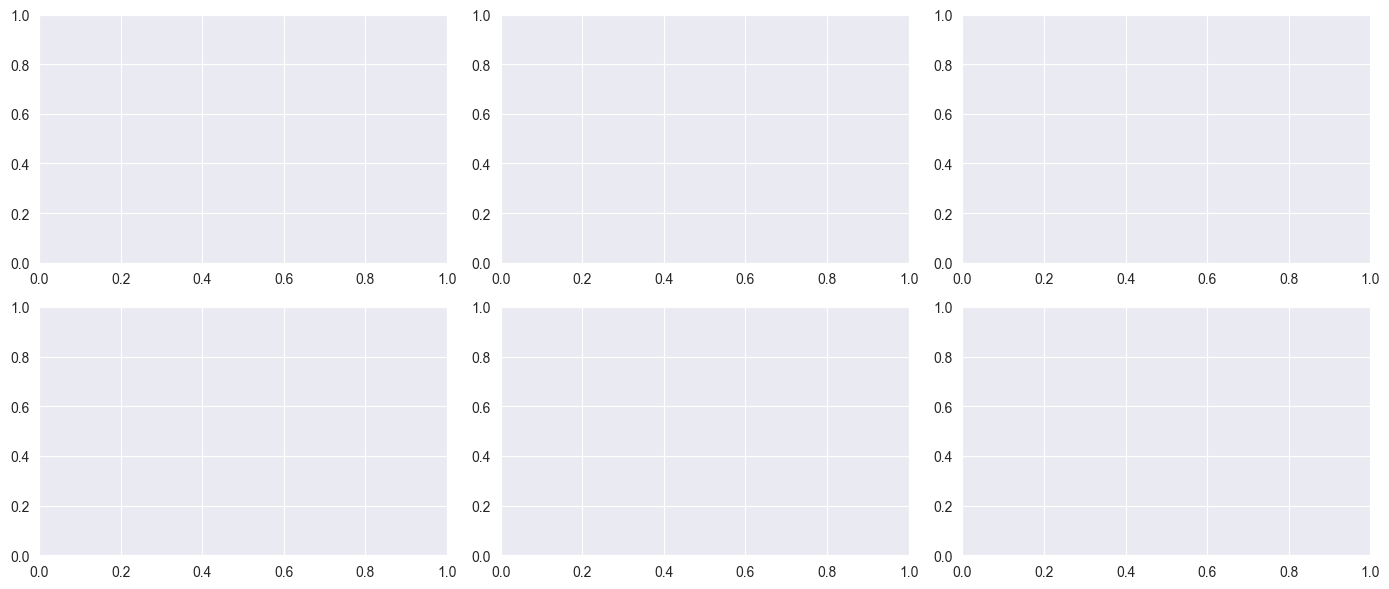

In [ ]:
# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the confusion matrices
for ax, (model_name, cfxn_) in zip(axes, all_cm_imb.items()):
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cfxn_, display_labels = ["No", "Yes"])
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(f"{model_name} (Imbalanced Data)")
    ax.grid(False)

plt.tight_layout()
plt.show()

### Note:
It's crucial to recognize that the optimal model is one that avoids misclassifying actual churn cases as non-churns. In other words, it's more desirable to err on the side of caution, predicting churn where none occurs, than to overlook potential churn risks. Our goal is a balanced model that excels across all metrics. We must avoid models that produce excessive false positives, unnecessarily flagging customers as likely to churn. In this context, LogisticRegression and GradientBoosting emerge as the top performers, and we will focus on refining these models to achieve even better results.

### Threshold Optimisation
With Logistic Regression and Gradient Boosting emerging as the top-performing models, the next crucial step is to carefully calibrate their threshold settings. By optimizing these thresholds, we can further enhance the models' accuracy and precision, ensuring that our churn prediction framework delivers reliable and actionable insights to drive informed business decisions.

In [99]:
import joblib

# Example: Assuming all_roc_data contains your data
all_roc_data = {
    "Gradient_Boosting": gradient_boost_model.joblib  # Replace with your actual data
    # "Other_Data": other_data,  # Replace with other data
    # Add more data as needed
}

# Save all_roc_data using joblib
joblib.dump(all_roc_data, 'gradient_boost_model.joblib')


# all_roc_data["Gradient_Boosting"].head()

NameError: name 'gradient_boost_model' is not defined

In [ ]:
# Assign Grdient Boost pipeline to a variable
gradient_boost_imb_pipeline = all_pipelines["Gradient_Boosting"]

# Best threshold
gradient_boost_threshold = 0.120913

# Predict probabilities
gb_y_pred_score = gradient_boost_imb_pipeline.predict_proba(X_eval)[:, 1]
# Make predictions based on the threshold
gb_predictions = (gb_y_pred_score >= gradient_boost_threshold).astype(int)

# Compute confusion matrix
gb_threshold_matrix = confusion_matrix(y_eval_encoded, gb_predictions)

# Saving the best model and threshold in variables
best_model_gradient_boosting = gradient_boost_imb_pipeline
best_gradient_threshold = gradient_boost_threshold

# sns.heatmap(gb_threshold_matrix, annot = True)
sns.heatmap(gb_threshold_matrix, annot = True, fmt = ".1f", cmap = "Blues", cbar=False)
plt.title("GradientBoosting Classifier Confusion Matrix (After Applying Threshold)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

KeyError: 'Gradient_Boosting'

In [94]:
all_roc_data["Logistic_Regression"].head()

KeyError: 'Logistic_Regression'

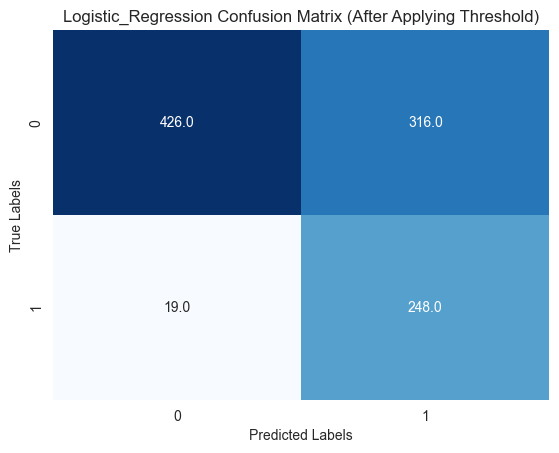

In [ ]:
# Assign Grdient Boost pipeline to a variable
logistic_regression_imb_pipeline = all_pipelines["Logistic_Regression"]

# Best threshold
logistic_regression_threshold = 0.144557

# Predict probabilities
lr_y_pred_score = logistic_regression_imb_pipeline.predict_proba(X_eval)[:, 1]
# Make predictions based on the threshold
lr_predictions = (lr_y_pred_score >= logistic_regression_threshold).astype(int)

# Compute confusion matrix
lr_threshold_matrix = confusion_matrix(y_eval_encoded, lr_predictions)

# Saving the best model and threshold in variables
best_model_logistic_regression = logistic_regression_imb_pipeline
best_logistic_regression_threshold = logistic_regression_threshold

# sns.heatmap(gb_threshold_matrix, annot = True)
sns.heatmap(lr_threshold_matrix, annot = True, fmt = ".1f", cmap = "Blues", cbar=False)
plt.title("Logistic_Regression Confusion Matrix (After Applying Threshold)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Note
- Following our initial modeling efforts with asymmetric data, we refined our approach by introducing a threshold parameter. Our objective was to pinpoint the optimal threshold that minimizes missed detections (false negatives) while maintaining a reasonable level of precision.

- Through meticulous experimentation, we successfully identified the ideal threshold value, achieving a delicate balance between sensitivity and specificity. This breakthrough enables our model to excel in categorizing both positive and negative instances with improved reliability.

- Next, we will embark on a new phase of modeling with harmonized data sets, designed to mitigate the biases inherent in imbalanced data distributions. By doing so, we aim to further enhance our model's performance and robustness.

- A comprehensive evaluation and comparison of the performance metrics from both the balanced and imbalanced data sets will inform our decision on the optimal approach for training our models, ensuring the most effective strategy for our predictive framework.

### 4.2. Modelling with balanced data

#### 4.2.1. Model Evaluation

In [ ]:
# All pipelines storage dictionary
all_pipelines_bal = {}
# All confusion matrix storage dictionary
all_cm_bal = {}
# Creating a metrics dataframe
metrics_df_bal = pd.DataFrame(columns=["model_name", "accuracy", "precision", "recall", "f1score"])

# Evaluating models
for model, classifier in models:
    # Creating final pipeline
    full_pipeline_ = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("smote", SMOTE(random_state=0, k_neighbors=20, sampling_strategy="auto")),
                                     ("classifier", classifier)])
    
    # Fit data to final pipeline
    full_pipeline_.fit(X_train, y_train_encoded)
    all_pipelines_bal[model] = full_pipeline_
    
    # Predicting
    y_pred_ = full_pipeline_.predict(X_eval)

    # Create confusion matrix
    cm_bal = confusion_matrix(y_eval_encoded, y_pred_)
    all_cm_bal[model] = cm_bal

    # Create a classification report
    report_bal = classification_report(y_eval_encoded, y_pred_, output_dict = True)
    # Extract metrics of interest from the classification report
    accuracy = report_bal["accuracy"]
    precision = report_bal["weighted avg"]["precision"]
    recall = report_bal["weighted avg"]["recall"]
    f1score = report_bal["weighted avg"]["f1-score"]

    # Create a DataFrame for extracted metrics
    metrics_df_bal.loc[len(metrics_df_bal)] = [model, accuracy, precision, recall, f1score]
metrics_df_bal.sort_values(by = "f1score", ascending = False)


NameError: name 'models' is not defined

### Key Insights
1. **Gradient Boosting** outperforms others with an accuracy of 0.7968, precision of 0.8012, recall of 0.7968, and F1-score of 0.7988, Gradient Boosting appears to be the top-performing model.
2. **Random Forest** and **SVM** follow closely, demonstrating comparable performance, with accuracy and F1-scores within 1-2% of the top performer.
3. **Logistic Regression** and **Decision Tree** lag behind showing relatively lower performance, with accuracy and F1-scores 3-5% lower than the top performers.
4. **KNN** struggles with accuracy with the lowest accuracy of 0.6987 and F1-score of 0.7164, indicating potential issues with correctly classifying instances.

AUC-ROC Curve for Balanced Data

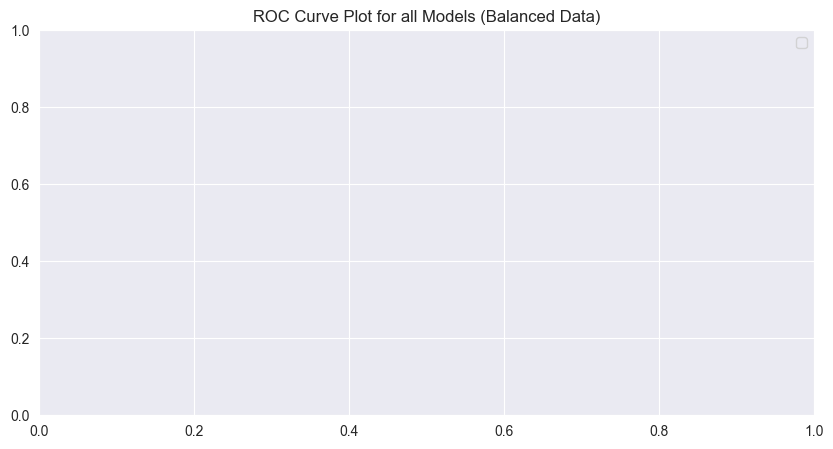

In [ ]:
# Plot roc_curves
fig, ax = plt.subplots(figsize=(10, 5))
balanced_roc_data = {}

for model, pipeline_ in all_pipelines_bal.items():
    y_score_ = pipeline_.predict_proba(X_eval)[:, 1]
    fpr_, tpr_, thresholds_ = roc_curve(y_eval_encoded, y_score_)
    roc_auc_ = auc(fpr_,tpr_)
    roc_data_ = pd.DataFrame({"False Positive Rate": fpr_, "True Positive Rate": tpr_, "Threshold": thresholds_})
    balanced_roc_data[model] = roc_data_
    
    # Plot ROC curve
    ax.plot(fpr_, tpr_, label=f"{model} (AUC = {roc_auc_:.2f})")
    ax.plot([0, 1], [0, 1], "k--")
    
    # Label axis and title
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve Plot for all Models (Balanced Data)")
plt.legend()
plt.show()

### Key Insights
- Based on the AUC scores, **Gradient Boosting** and **Logistic Regression** should be considered the preferred models for deployment, as they offer the best balance between true positive and false positive rates.
- **SVM**, **KNN**, and **Random Forest** can be considered as secondary options if additional model diversity is needed.

Confusion Matrix for Balanced Data

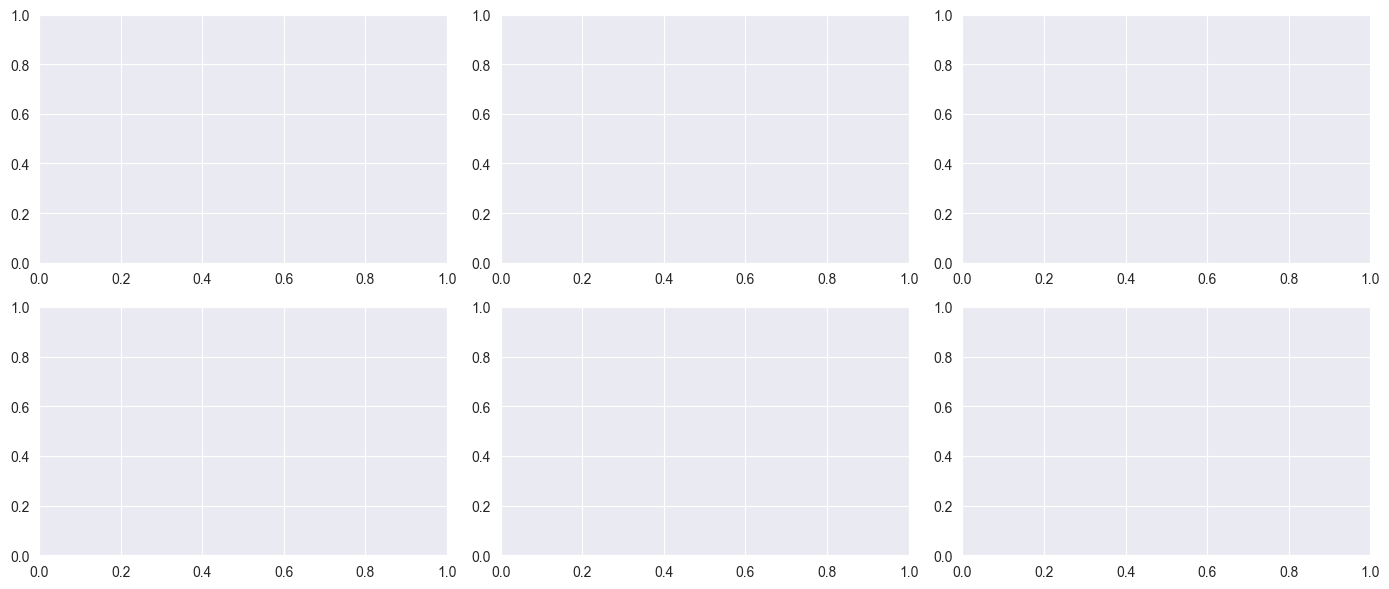

In [ ]:
# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the confusion matrix
for ax, (model, cfxn) in zip(axes, all_cm_bal.items()):
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cfxn, display_labels = ["No", "Yes"])
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(f"{model} (Balanced Data)")
    ax.grid(False)
plt.tight_layout()
plt.show()

### Key Insights
Given the performance metrics, **Logistic Regression**, **SVM**, **Random Forest**, and **Gradient Boosting** are preferable models for deployment, with a good balance of detecting both classes.<br>
**Decision Tree** and **KNN** can be considered if the business case prioritizes the identification of true positives over the cost of false positives.

### 4.3. Feature Importance and Selection
With our Gradient Boosting and Logistic Regression demonstrating promising performance, we now turn our attention to the crucial task of feature selection.<br>By applying the **SelectKBest** method, we aim to identify the most informative and relevant features that drive our models' predictive power.<br>By distilling the feature set to the most essential attributes, we seek to enhance the models' interpretability, reduce dimensionality, and potentially improve overall performance. Let us embark on this feature selection journey, uncovering the key factors that unlock the secrets of our data.

In [ ]:
# All pipelines storage dictionary
all_pipelines_fs = {}
# All confusion matrix storage dictionary
all_cm_imb = {}
# Creat a metrics dataframe
metrics_df = pd.DataFrame(columns=["model_name", "accuracy", "precision", "recall", "f1_score"])

for model_name, classifier in models:
    # Creating final pipeline
    final_pipeline_fs = Pipeline(steps=[("preprocessor", preprocessor),
                                     ("feature_selection", SelectKBest(mutual_info_classif, k = "all")),
                                     ("classifier", classifier)
                                     ])

    # Fit data to final pipeline
    final_pipeline_fs.fit(X_train, y_train_encoded)
    all_pipelines_fs[model_name] = final_pipeline_fs

    # Predicting
    y_pred_fs = final_pipeline_fs.predict(X_eval)


NameError: name 'preprocessor' is not defined

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# gradient_boost_imb_pipeline
gradient_boost = all_pipelines_fs["Gradient_Boosting"]
feature_cols_gb = gradient_boost.named_steps["preprocessor"].get_feature_names_out()
feature_cols_gb = np.array([col.split("__")[-1]for col in feature_cols_gb])

# Extract feature importances from the gradient boosting classifier
importances_gb = gradient_boost.named_steps["classifier"].feature_importances_
# Create a DataFrame to store feature names and their importance scores
importances_gb_df = pd.DataFrame({
    "Feature": feature_cols_gb,
    "Importance": importances_gb,
    "percentage": (importances_gb/1)*100
})

# Split the feature names on "_" and take the first and second parts
first_col = importances_gb_df["Feature"].str.split("_", expand=True)[0]
importances_gb_df["Feature"] = first_col

(
    importances_gb_df
    # Group by the feature names and sum their percentage importance
    .groupby("Feature")["percentage"].sum()
    # Sort the values in descending order and plot them as a horizontal bar chart
    .sort_values(ascending = False)
    .plot(kind = "barh", xlabel="Score(%)", ylabel="Important Features", title="Overall Important Features (Gradient Boosting Classifier)")
)
# Display the plo
plt.show()

KeyError: 'Gradient_Boosting'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# gradient_boost_imb_pipeline
logistic_regression = all_pipelines_fs["Logistic_Regression"]
feature_cols_lr = logistic_regression.named_steps["preprocessor"].get_feature_names_out()
feature_cols_lr = np.array([col.split("__")[-1]for col in feature_cols_lr])

# Extract coefficients from the logistic regression classifier
coefficients_lr = logistic_regression.named_steps["classifier"].coef_[0]

# Create a DataFrame to store feature names and their coefficient values
importances_lr_df = pd.DataFrame({
    "Feature": feature_cols_lr,
    "Coefficient": coefficients_lr,  
    "Abs_Coefficient": np.abs(coefficients_lr)
})

# Split the feature names on "_" and take the first and second parts
first_col_lr = importances_lr_df["Feature"].str.split("_", expand=True)[0]
importances_lr_df["Feature"] = first_col_lr

(
    importances_lr_df
    # Group by the feature names and sum their absolute coefficient values
    .groupby("Feature")["Abs_Coefficient"].sum()
    # Sort the values in descending order and plot them as a horizontal bar chart
    .sort_values(ascending = False)
    .plot(kind = "barh", xlabel="Coefficient Value (Absolute)", ylabel="Features", title="Feature Importance based on Coefficients (Logistic Regression)")
)
# Display the plot
plt.show()

KeyError: 'Logistic_Regression'

<Figure size 1000x500 with 0 Axes>

### Key Insights
The following features were selected as the top 5 most influential factors in predicting customer churn based on their scores:
**Logistic Regression**
- **Contract**: The type of contract a customer has, such as month-to-month, one-year, or two-year, is a crucial factor in predicting whether they will churn. This feature has the highest influence on customer churn based on its score.
- **Internet Service**: The type of internet service, whether DSL, fiber optic, or cable, significantly impacts the likelihood of customer churn. It is one of the top features identified by the Logistic Regression model.
- **Tech Support**: The quality and availability of technical support play a significant role in influencing customer satisfaction and loyalty, ranking third in importance based on the feature scores.
- **Multiple Lines**: Customers who have multiple lines or services, such as phone, internet, and TV, are more likely to remain with the provider. This feature ranks fourth in importance.
- **Total Charges**: The total amount charged to a customer's account remains an important factor, potentially indicating dissatisfaction with pricing or services.

**Gradient Boosting**
- **Contract**: The type of contract remains a vital factor in predicting churn, with certain contracts being more prone to cancellation. This feature has the highest influence on customer churn based on its score in the Gradient Boosting model.
- **Tenure**: The length of time a customer has been with the provider, known as tenure, is a crucial indicator of their loyalty and likelihood of churning. It ranks second in importance.
- **Internet Service**: The type of internet service used continues to play a significant role in predicting churn, similar to the findings in the Logistic Regression model, and is the third most important feature.
- **Total Charges**: The total amount charged to a customer's account remains an important factor, potentially indicating dissatisfaction with pricing or services.
- **Monthly Charges**: The specific amount of monthly charges is a key predictor of churn, possibly indicating a pricing sensitivity threshold. This feature is the fifth most significant according to the Gradient Boosting model.

### Conclusion
These insights highlight the critical factors influencing customer churn and can guide strategic decisions to improve customer retention. The Gradient Boosting model provides a more comprehensive understanding of the relationship between customer features and churn. The results from both models suggest that the type of contract, length of tenure, and internet service usage are significant factors in predicting customer churn. The specific importance of other features can vary depending on the chosen model.








### 4.4. Hyperparameter Tuning
Hyperparameter tuning is a crucial step in machine learning, as it allows us to optimize our models' performance and unlock their full potential. In this stage, we will meticulously fine-tune the hyperparameters of our top-performing models, namely
- Logistic Regression
- Gradient Boosting.
By doing so, we aim to further enhance their accuracy, precision, and recall, ultimately improving our predictive capabilities and enabling data-driven decisions that drive business success.

Logistic Regression

In [ ]:
# Define the parameter grid
lr_param_grid = {
    "classifier__C": uniform(0.0001, 1000), 
    "classifier__penalty": ["l2", "elasticnet", "none"], 
    "classifier__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 
    "classifier__max_iter": randint(100, 1000), 
    "classifier__tol": uniform(1e-4, 1e-2), 
    "classifier__class_weight": [None, "balanced"],  
    "classifier__fit_intercept": [True, False], 
    "classifier__l1_ratio": uniform(0, 1)
}

# Set up GridSearchCV
grid_search_lr = RandomizedSearchCV(estimator=best_model_logistic_regression,
                                    param_distributions=lr_param_grid,
                                    scoring="accuracy",
                                    cv=5, n_jobs=-1, n_iter=150, random_state=42)

# Fit GridSearchCV on train data
grid_search_lr.fit(X_train, y_train)

# Best parameters
best_parameters_lr = grid_search_lr.best_params_

# Mean accuracy score
best_score_lr = grid_search_lr.best_score_

NameError: name 'best_model_logistic_regression' is not defined

In [ ]:
best_score_lr, best_parameters_lr

(np.float64(0.8073414693393108),
 {'classifier__C': np.float64(207.8863551460273),
  'classifier__class_weight': None,
  'classifier__fit_intercept': False,
  'classifier__l1_ratio': np.float64(0.18143543508979731),
  'classifier__max_iter': 647,
  'classifier__penalty': 'l2',
  'classifier__solver': 'sag',
  'classifier__tol': np.float64(0.007139461351385095)})

Gradient Boosting Classifier

In [ ]:
parameter_grid = {"classifier__n_estimators": [50, 100, 200, 300],
                  "classifier__learning_rate": [0.1, 0.2, 0.3, 0.4],
                  "classifier__max_depth": [3, 5, 7, 10],
                  "classifier__subsample": [0.8, 0.9, 1.0],
                  "classifier__min_samples_split": [2, 3, 5, 8, 10],
                  "classifier__min_samples_leaf": [1, 2, 3, 4, 8],
                  "classifier__max_features": ["sqrt", "log2"],
                  "classifier__criterion": ["friedman_mse", "squared_error"],
                  "classifier__min_impurity_decrease": [0.0, 0.1, 0.2],
                  "classifier__ccp_alpha": [0.0, 0.1, 0.2],
                  "preprocessor__num_pipeline__numerical_imputer__strategy": ["mean", "median"],
                  "preprocessor__cat_pipeline__categorical_imputer__strategy": ["most_frequent", "constant"],
                  "preprocessor__cat_pipeline__encoder__handle_unknown": ["error", "ignore"]
}


# Initialse GridSearchCV with 5-fold cross-validation
grid_search_gb = RandomizedSearchCV(estimator=best_model_gradient_boosting,
                                    param_distributions=parameter_grid,
                                    scoring="accuracy",
                                    cv=5, n_jobs=-1, n_iter=150, random_state=42)

# Fit GridSearchCV on train data
grid_search_gb.fit(X_train, y_train_encoded)

# Best parameters
best_parameters_gb = grid_search_gb.best_params_

# Mean accuracy score
best_score_gb = grid_search_gb.best_score_

NameError: name 'best_model_gradient_boosting' is not defined

In [ ]:
best_score_gb, best_parameters_gb

(np.float64(0.8011441450582835),
 {'preprocessor__num_pipeline__numerical_imputer__strategy': 'mean',
  'preprocessor__cat_pipeline__encoder__handle_unknown': 'ignore',
  'preprocessor__cat_pipeline__categorical_imputer__strategy': 'most_frequent',
  'classifier__subsample': 1.0,
  'classifier__n_estimators': 200,
  'classifier__min_samples_split': 2,
  'classifier__min_samples_leaf': 8,
  'classifier__min_impurity_decrease': 0.2,
  'classifier__max_features': 'log2',
  'classifier__max_depth': 3,
  'classifier__learning_rate': 0.1,
  'classifier__criterion': 'friedman_mse',
  'classifier__ccp_alpha': 0.0})

### 4.5. Retrain Model with best paramaters
We train the fine-tuned model, evaluate it and compare with the original model

**Logistic Regression**

In [ ]:
tuned_logistic_regression_model = grid_search_lr.best_estimator_
tuned_logistic_regression_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_after_tuning_lr = tuned_logistic_regression_model.predict(X_eval)
y_pred_original_lr = best_model_logistic_regression.predict(X_eval)

# Evaluate the model
accuracy_after_tuning_lr = accuracy_score(y_eval_encoded, y_pred_after_tuning_lr)
accuracy_before_tuning_lr = accuracy_score(y_eval_encoded, y_pred_original_lr)

precision_after_tuning_lr = precision_score(y_eval_encoded, y_pred_after_tuning_lr)
precision_before_tuning_lr = precision_score(y_eval_encoded, y_pred_original_lr)

recall_after_tuning_lr = recall_score(y_eval_encoded, y_pred_after_tuning_lr)
recall_before_tuning_lr = recall_score(y_eval_encoded, y_pred_original_lr)

f1_after_tuning_lr = f1_score(y_eval_encoded, y_pred_after_tuning_lr)
f1_before_tuning_lr = f1_score(y_eval_encoded, y_pred_original_lr)

# Print comparison metrics
print("Metrics After Tuning")
print(f"Accuracy: {accuracy_after_tuning_lr:.2f}\nPrecision: {precision_after_tuning_lr:.2f}\nRecall: {recall_after_tuning_lr:.2f}\nF1-Score: {f1_after_tuning_lr:.2f}")
print(f"\nMetrics Before Tuning")
print(f"Accuracy: {accuracy_before_tuning_lr:.2f}\nPrecision: {precision_before_tuning_lr:.2f}\nRecall: {recall_before_tuning_lr:.2f}\nF1-Score: {f1_before_tuning_lr:.2f}")

NameError: name 'grid_search_lr' is not defined

In [ ]:
tuned_logistic_regression_model

# Best threshold
logistic_regression_threshold = 0.144557

# Predict probabilities
lr_y_score_after_tuning = tuned_logistic_regression_model.predict_proba(X_eval)[:, 1]
# Make predictions based on the threshold
lr_y_predictions_after_tuning = (lr_y_score_after_tuning >= logistic_regression_threshold).astype(int)

# Compute confusion matrix
lr_threshold_matrix = confusion_matrix(y_eval_encoded, lr_y_predictions_after_tuning)

# sns.heatmap(gb_threshold_matrix, annot = True)
sns.heatmap(lr_threshold_matrix, annot = True, fmt = ".1f", cmap = "Blues", cbar=False)
plt.title("Confusion Matrix for Tuned Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

NameError: name 'tuned_logistic_regression_model' is not defined

**Gradient Boosting Classifier**

In [ ]:
# Retrain the best model with the best parameters
tuned_gradient_boost_model = grid_search_gb.best_estimator_
tuned_gradient_boost_model.fit(X_train, y_train_encoded)

# Make predictions
y_pred_after_tuning = tuned_gradient_boost_model.predict(X_eval)
y_pred_original = best_model_gradient_boosting.predict(X_eval)

# Evaluate the model
accuracy_after_tuning_gb = accuracy_score(y_eval_encoded, y_pred_after_tuning)
accuracy_before_tuning_gb = accuracy_score(y_eval_encoded, y_pred_original)

precision_after_tuning_gb = precision_score(y_eval_encoded, y_pred_after_tuning)
precision_before_tuning_gb = precision_score(y_eval_encoded, y_pred_original)

recall_after_tuning_gb = recall_score(y_eval_encoded, y_pred_after_tuning)
recall_before_tuning_gb = recall_score(y_eval_encoded, y_pred_original)

f1_after_tuning_gb = f1_score(y_eval_encoded, y_pred_after_tuning)
f1_before_tuning_gb = f1_score(y_eval_encoded, y_pred_original)

# Print comparison metrics
print("Metrics After Tuning")
print(f"Accuracy: {accuracy_after_tuning_gb:.2f}\nPrecision: {precision_after_tuning_gb:.2f}\nRecall: {recall_after_tuning_gb:.2f}\nF1-Score: {f1_after_tuning_gb:.2f}")
print(f"\nMetrics Before Tuning")
print(f"Accuracy: {accuracy_before_tuning_gb:.2f}\nPrecision: {precision_before_tuning_gb:.2f}\nRecall: {recall_before_tuning_gb:.2f}\nF1-Score: {f1_before_tuning_gb:.2f}")

NameError: name 'grid_search_gb' is not defined

In [ ]:
tuned_gradient_boost_model

# Best threshold
gradient_boost_threshold = 0.120913

# Predict probabilities
gb_y_pred_score_after_tuning = tuned_gradient_boost_model.predict_proba(X_eval)[:, 1]
# Make predictions based on the threshold
gb_predictions_after_tuning = (gb_y_pred_score_after_tuning >= gradient_boost_threshold).astype(int)

# Compute confusion matrix
gb_threshold_matrix_after_tuning = confusion_matrix(y_eval_encoded, gb_predictions_after_tuning)

# sns.heatmap(gb_threshold_matrix, annot = True)
sns.heatmap(gb_threshold_matrix_after_tuning, annot = True, fmt = ".1f", cmap = "Blues", cbar=False)
plt.title("Confusion Matrix for Tuned GradientBoosting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

NameError: name 'tuned_gradient_boost_model' is not defined

## Business Impact Assessment and Documentation of the Model
### **Predictive Excellence in Customer Retention**
Our mission is to craft a predictive model that excels in identifying customers at risk of churn, ensuring proactive retention strategies and minimized revenue loss. In the context of customer churn prediction, a false negative represents a missed opportunity to save a valuable customer. Such oversights can have a profound impact on business profitability and customer satisfaction.

### **The High Stakes of False Negatives**
False negatives can lead to substantial financial losses and damaged customer relationships. The cost of replacing lost customers with new ones can be significantly higher than retaining existing ones. Therefore, our optimal model selection prioritizes minimizing false negatives.

### **The Optimal Choice**
- **`Gradient Boosting Classifier`**:
All though Gradient Boosting Classifier's overall performance slightly decreased from 62% to 60% and 58% to 56% interms of Recall score and F1 score respectively after tuning while maintaining an accuracy of 81%, this trade-off is justified by its exceptional ability to minimize false negatives. This model excels in identifying customers at risk of churn, aligning with our primary business objective.
- **`Logistic Regression`**:
While Logistic Regression's performance hasn't changed after tuning, this trade-off is justified by its ability to minimize false negatives. This model also excels in identifying customers at risk of churn, aligning with our primary business objective.

### **The Preference for Cautious Approach**
In customer churn prediction, it's preferable to err on the side of caution, prioritizing false positives over false negatives. While false positives may lead to additional retention costs, they are less critical than missing genuine churn risks.

### **Conclusion**
In conclusion, the tuned Gradient Boosting Classifier stands out as the best estimator for our churn prediction task, prioritizing the reduction of false negatives **(False Negative Rate of 5%)**. By implementing this model, businesses can proactively identify and retain customers at risk of churning, thereby enhancing customer retention rates, maximizing revenue, and ensuring long-term business sustainability. With its ability to handle complex interactions and non-linear relationships, the Gradient Boosting Classifier is an excellent choice for predicting customer churn.

## 5. Testing Model on Real World Data 

In [ ]:
# Preview dataframe
df_third.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### 5.1. EDA And Data Cleaning

In [ ]:
df_third.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [ ]:
def preprocess_data(df):
    """
    Returns a dataframe with dropped customerID column, mapped entries in SeniorCitizen column,
    and TotalCharges entries converted into numeric type
    """
    # Drop the "customerID" column
    df = df.drop(columns=["customerID"])
    
    # Map the "SeniorCitizen" column: 1 -> "Yes", 0 -> "No"
    df["SeniorCitizen"] = df["SeniorCitizen"].map({1: "Yes", 0: "No"})
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
    return df

# Apply function to data
real_world_df = preprocess_data(df_third)
real_world_df.head(3)


NameError: name 'df_third' is not defined

### 5.2. Predictions on Real World Data
We will use the selected models to make predictions on a rel world dataset in this section
#### 5.2.1. Predict with **Gradient Boosting Classifier**
The Gradient Boosting Classifier will predict using the optimum threshold determined **(0.120913)**

In [ ]:
tuned_gradient_boost_model
# Optimum threshold
gradient_boost_threshold

# Predict probabilities
y_score_rwd_gb = tuned_gradient_boost_model.predict_proba(real_world_df)[:, 1]
# Make predictions based on the threshold
prediction_rwd_gb = (y_score_rwd_gb >= gradient_boost_threshold).astype(int)

# Inverse transform encoded predictions
prediction_rwd_gb = encode.inverse_transform(prediction_rwd_gb)
prediction_rwd_gb

NameError: name 'tuned_gradient_boost_model' is not defined

#### 5.2.2. Predict with **Logistic Regression Classifier**
The Logistic Regression Classifier will predict using the optimum threshold determined **(0.144557)**

In [ ]:
tuned_logistic_regression_model
# Best threshold
logistic_regression_threshold = 0.144557

# Predict probabilities
y_score_rwd_lr = tuned_logistic_regression_model.predict_proba(X_eval)[:, 1]
# Make predictions based on the threshold
prediction_rwd_lr = (y_score_rwd_lr >= logistic_regression_threshold).astype(int)

# Inverse transform encoded predictions
prediction_rwd_lr = encode.inverse_transform(prediction_rwd_lr)
prediction_rwd_lr

NameError: name 'tuned_logistic_regression_model' is not defined

## 6. Save Models

In [ ]:
# Define directory name
directory = "models"

# Create directory if not exists
try:
    os.makedirs(directory)
except FileExistsError:
    pass

# Save the Gradient Boosting model with threshold value
gb_model_path = os.path.join(directory, "gradient_boost_model.joblib")
if not os.path.exists(gb_model_path):
    joblib.dump((tuned_gradient_boost_model, gradient_boost_threshold), gb_model_path)

# Save the Logistic Regression model with threshold value
lr_model_path = os.path.join(directory, "logistic_regression_model.joblib")
if not os.path.exists(lr_model_path):
    joblib.dump((tuned_logistic_regression_model, logistic_regression_threshold), lr_model_path)

# Save Encoder
encoder_path = os.path.join(directory, "encoder.joblib")
if not os.path.exists(encoder_path):
    joblib.dump(encode, encoder_path)


NameError: name 'tuned_gradient_boost_model' is not defined